<a href="https://colab.research.google.com/github/Chaitya0623/Antariksh_LP/blob/ML-Task1/AntarikshML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [679]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [680]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [681]:
hdf = pd.read_csv("/content/gdrive/MyDrive/Synapse_LP/synapse_w2/housing_data.csv")

In [682]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [683]:
hdf.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [684]:
hdf.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [685]:
hdf.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


**Normalization**

In [686]:
X = hdf[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Price']]
X = X.apply(lambda x: (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0)))
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
0,0.686822,0.441986,0.501502,0.464444,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.250702
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.425683
4996,0.675097,0.633450,0.444024,0.448889,0.597881
4997,0.507135,0.670026,0.208534,0.028889,0.413672
4998,0.558419,0.420389,0.517579,0.764444,0.482127


In [687]:
hdf[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Price']] = X
hdf

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0.686822,0.441986,0.501502,0.464444,23086.800503,0.425210,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,0.683521,0.488538,0.464501,0.242222,40173.072174,0.607369,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,0.483737,0.468609,0.701350,0.695556,36882.159400,0.425192,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,0.506630,0.660956,0.312430,0.280000,34310.242831,0.507384,USS Barnett\nFPO AP 44820
4,0.469223,0.348556,0.611851,0.495556,26354.109472,0.250702,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,22837.361035,0.425683,USNS Williams\nFPO AP 30153-7653
4996,0.675097,0.633450,0.444024,0.448889,25616.115489,0.597881,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,0.507135,0.670026,0.208534,0.028889,33266.145490,0.413672,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,0.558419,0.420389,0.517579,0.764444,42625.620156,0.482127,USS Wallace\nFPO AE 73316


Removing Unnecessary Columns

In [688]:
X = hdf.select_dtypes(include=np.number)
y = hdf['Price']
X.drop(['Price'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [689]:
print(X.shape, y.shape)

(5000, 5) (5000,)


In [690]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,23086.800503
1,0.683521,0.488538,0.464501,0.242222,40173.072174
2,0.483737,0.468609,0.701350,0.695556,36882.159400
3,0.506630,0.660956,0.312430,0.280000,34310.242831
4,0.469223,0.348556,0.611851,0.495556,26354.109472


In [691]:
y.head()

0    0.425210
1    0.607369
2    0.425192
3    0.507384
4    0.250702
Name: Price, dtype: float64

**Regression**

In [692]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [693]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions.dtype)
print(predictions.shape)

float64
(1500,)


**Plotting**

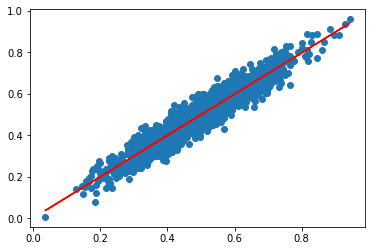

In [694]:
plt.scatter(predictions,y_test)
m, b = np.polyfit(predictions, y_test, 1)
plt.plot(predictions, m*predictions + b, color='red')

In [695]:
from sklearn import metrics
round(metrics.r2_score(predictions, y_test), 3)

0.906

In [696]:
print(y_test)

3135    0.243539
4025    0.357616
4623    0.635219
1471    0.244912
4003    0.603653
          ...   
3016    0.592110
1870    0.607956
541     0.544008
1496    0.344540
308     0.548518
Name: Price, Length: 1500, dtype: float64


In [697]:
print(predictions)

[0.32149345 0.34436259 0.65356348 ... 0.62126223 0.3242122  0.50984177]


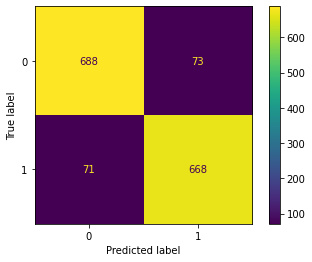

In [701]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cutoff = 0.5                      # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1 
y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
cm = confusion_matrix(y_test_classes, y_pred_classes)
f = ConfusionMatrixDisplay(cm).plot()

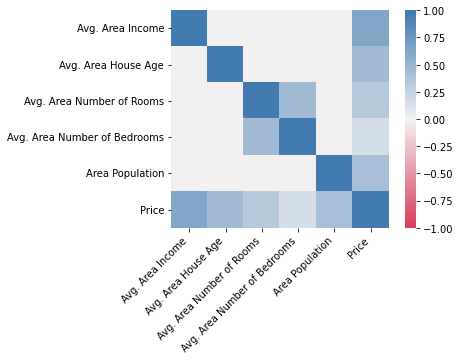

In [703]:
# Correlation Matrix
import seaborn as sns
corr = hdf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(5, 245, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Logistic Regression

In [705]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [706]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [707]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [709]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [710]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Removing Unnecessary Columns**

In [711]:
df.drop(['id', 'gender'], axis=1, inplace=True)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [712]:
df.isna().sum()

age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [713]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [714]:
df.isna().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Normalization**

In [715]:
X = df[['age', 'avg_glucose_level', 'bmi']]
X = X.apply(lambda x: (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0)))
X

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.212981
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.212981
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [716]:
df[['age','avg_glucose_level', 'bmi']] = X
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1
2,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1,0,Yes,Private,Urban,0.132167,0.212981,never smoked,0
5106,0.987793,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
5107,0.426270,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0
5108,0.621582,0,0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0


**One Hot Encoding**

In [717]:
df = pd.get_dummies(data=df, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.801265,0.301260,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0.743652,0,0,0.679023,0.212981,1,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0.975586,0,1,0.234512,0.254296,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0.597168,0,0,0.536008,0.276060,1,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0.963379,1,0,0.549349,0.156930,1,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1,0,0.132167,0.212981,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,0.987793,0,0,0.323516,0.340206,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,0.426270,0,0,0.128658,0.232532,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0.621582,0,0,0.513203,0.175258,0,0,1,0,0,1,0,0,1,0,0,1,0,0


**Regression**

In [718]:
y_label = df['stroke']

In [719]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y_label,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 19)
(1533, 19)
(3577,)
(1533,)


In [728]:
from sklearn.linear_model import LogisticRegression
# Create a Linear Regression object 'lr' by calling LogisticRegression()
lr = LogisticRegression()

In [729]:
lr.fit(X_train,y_train)

LogisticRegression()

**Plotting**

In [730]:
predictions = lr.predict(X_test)
print(predictions.dtype)
print(predictions.shape)

int64
(1533,)


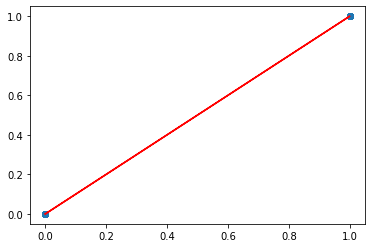

In [731]:
plt.scatter(predictions,y_test)
m, b = np.polyfit(predictions, y_test, 1)
plt.plot(predictions, m*predictions + b, color='red')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


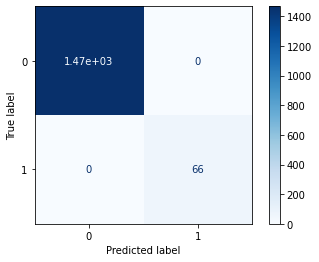

In [732]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lr,X_test,y_test, cmap= 'Blues', values_format='.3g')

In [733]:
disp.confusion_matrix

array([[1467,    0],
       [   0,   66]])

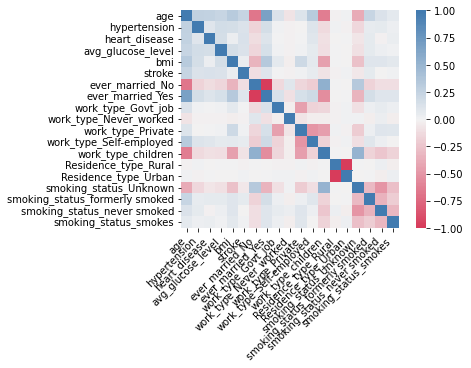

In [734]:
# Correlation Matrix
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(5, 245, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [735]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

1.0